# Chapter 2. 데이터와 표본분포

In [26]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.utils import resample

path = 'c:/reposit/data/book/practicalstatistics/'

In [44]:
# 데이터 불러오기
loans_income = pd.read_csv(path + 'loans_income.csv', squeeze=True)
nflx = pd.read_csv(path + 'sp500_data.csv.gz').NFLX

C:\Users\Playdata\AppData\Local\Temp\ipykernel_17600\3979505792.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loans_income = pd.read_csv(path + 'loans_income.csv', squeeze=True)


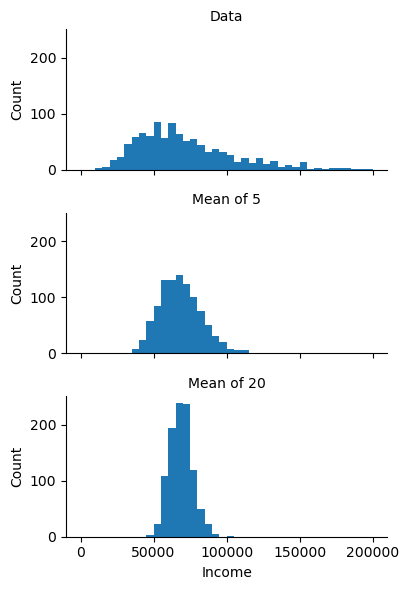

In [17]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data'
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

## 2.4 부트스트랩

In [25]:
# 부트스트랩
results = []

for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())

results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.median() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: 0.0
std. error: 190.01509268067713


## 2.6 정규분포

### 2.6.1 표준정규분포와 QQ 그림

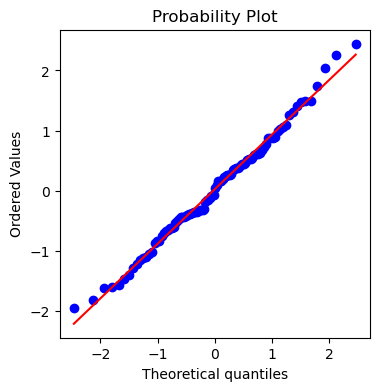

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.show()

## 2.7 긴 꼬리 분포

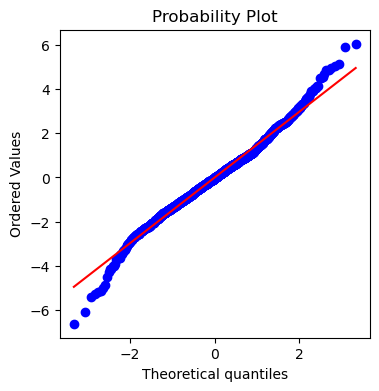

In [45]:
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.show()

## 2.9 이항분포

In [48]:
print(stats.binom.pmf(2, n=5, p=0.1))
print(stats.binom.cdf(2, n=5, p=0.1))

0.07289999999999992
0.99144


## 2.10 카이제곱분포

## 2.11 F 분포

## 2.12 푸아송 분포와 그 외 관련 분포들

### 2.12.1 푸아송 분포

In [49]:
stats.poisson.rvs(2, size=100)

array([1, 3, 3, 2, 1, 4, 3, 2, 4, 3, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0,
       0, 2, 4, 5, 2, 1, 4, 1, 1, 2, 4, 3, 1, 1, 1, 1, 2, 1, 2, 2, 3, 2,
       0, 3, 1, 3, 2, 2, 0, 1, 2, 2, 6, 1, 2, 2, 3, 3, 1, 1, 2, 4, 1, 1,
       1, 4, 1, 2, 6, 4, 1, 3, 1, 2, 4, 1, 0, 2, 3, 0, 3, 3, 1, 0, 4, 1,
       2, 5, 1, 5, 1, 3, 1, 2, 3, 2, 0, 3], dtype=int64)

### 2.12.2 지수분포

In [51]:
stats.expon.rvs(scale=0.2, size=100)
stats.expon.rvs(scale=5, size=100)

array([18.746749  ,  7.00364895,  1.87068864,  6.02701771,  3.41733001,
        5.12989604,  2.16528402,  1.85902758,  0.20385033,  4.73650281,
        8.87752874,  3.82501471,  3.2479735 ,  3.33257631,  4.60199614,
        2.64223886,  0.36119543, 11.02737111,  4.23322916,  0.30158634,
        7.38911503,  0.48928404,  8.6377775 ,  7.26912709, 11.99607908,
        0.04651774,  9.78784065, 34.7994168 , 12.70903394, 10.14432616,
        9.86856198,  4.63150555,  0.87904537,  9.91859467,  3.20852109,
       15.3789217 ,  3.93059522, 18.26346623,  6.17964765,  0.65511465,
        5.26244443,  1.99550673,  4.70835917,  2.41087639,  2.40180937,
        5.73847573,  0.7738981 ,  3.924968  ,  4.64307054,  0.6093385 ,
        4.93672192,  0.93356091,  5.35949531,  3.61183809,  0.1605107 ,
        0.80734064,  8.7248534 ,  6.06630616,  8.64517882,  0.55808256,
        1.85777456,  6.08031371,  1.86942548,  6.46884819,  1.3253925 ,
        8.64100271,  3.8822974 ,  9.71453922, 16.76927214,  5.65

### 2.12.3 고장률 추정

### 2.12.4 베이불 분포

In [52]:
stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 9066.81166224,  5492.31472416,  7846.47201808,   373.99170435,
        3883.27887754,  7813.76683267,  4236.19205303,  3904.12388178,
        1327.88855936,   239.77992191,  2114.61470859,  8199.78293984,
        2283.66989061,  8973.50928878,  2055.74823852,  5944.02372599,
        1531.90671371,  6656.65380152,  7479.50631385,  5109.6400392 ,
        2289.35120358,  2564.0802289 ,   807.16909158,  8508.84469654,
        5460.99081193,  1053.7283318 ,  5404.93116787,  3736.68770375,
        2359.298999  ,  5346.2709282 ,  4612.20514434,  7020.18462605,
        2633.11958925,  4357.30897423,  1143.31103474,   555.58295673,
        8758.34559106,  7344.70560731,   335.92001573,  4074.27793633,
        2845.91490274,   333.58462437,  6553.50561514,  3359.89462046,
        4327.75518952,  1632.85676809,   654.2013981 ,  2992.84458311,
        2383.09601691,  6128.25944682,  5107.28569578,  6681.12900623,
       10316.78461484,  8748.91254814, 11720.68089609, 13114.37315881,
      